In [1]:
!pip install rasterio vit-pytorch einops mpl_scatter_density

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 20.9 MB 1.4 MB/s 
     |████████████████████████████████| 81 kB 11.5 MB/s 
     |████████████████████████████████| 41 kB 574 kB/s 
     |████████████████████████████████| 655 kB 31.2 MB/s 
     |████████████████████████████████| 52 kB 1.6 MB/s 


In [2]:
# img_path = "./drive/MyDrive/Colab Notebooks/Thesis_Deliverable/Resources/Sentinel-2/"
img_path = "./drive/MyDrive/NewSatImg1/"
tif_path = "./drive/MyDrive/Colab Notebooks/Thesis_Deliverable/Resources/new_yield.tiff"

In [5]:
import sys 
sys.path.insert(0, '/content/drive/MyDrive/Colab Notebooks/Thesis_Deliverable/Sat_Img_Process')
sys.path.insert(0, '/content/drive/MyDrive/Colab Notebooks/Thesis_Deliverable/Models')
sys.path.insert(0, '/content/drive/MyDrive/Colab Notebooks/Thesis_Deliverable/Resources')

In [6]:
from Img_process import img_process
from Utils import *
process = img_process(img_path,tif_path)

In [7]:
process.show_paths()
for i in process.img_paths:
    print(i)

['./drive/MyDrive/NewSatImg1/Date_2017-10-21.tif', './drive/MyDrive/NewSatImg1/Date_2017-11-10.tif', './drive/MyDrive/NewSatImg1/Date_2017-12-20.tif', './drive/MyDrive/NewSatImg1/Date_2018-01-09.tif', './drive/MyDrive/NewSatImg1/Date_2018-01-29.tif', './drive/MyDrive/NewSatImg1/Date_2018-02-18.tif', './drive/MyDrive/NewSatImg1/Date_2018-03-10.tif', './drive/MyDrive/NewSatImg1/Date_2018-03-30.tif', './drive/MyDrive/NewSatImg1/Date_2018-04-19.tif', './drive/MyDrive/NewSatImg1/Date_2018-05-09.tif']
./drive/MyDrive/NewSatImg1/Date_2017-10-21.tif
./drive/MyDrive/NewSatImg1/Date_2017-11-10.tif
./drive/MyDrive/NewSatImg1/Date_2017-12-20.tif
./drive/MyDrive/NewSatImg1/Date_2018-01-09.tif
./drive/MyDrive/NewSatImg1/Date_2018-01-29.tif
./drive/MyDrive/NewSatImg1/Date_2018-02-18.tif
./drive/MyDrive/NewSatImg1/Date_2018-03-10.tif
./drive/MyDrive/NewSatImg1/Date_2018-03-30.tif
./drive/MyDrive/NewSatImg1/Date_2018-04-19.tif
./drive/MyDrive/NewSatImg1/Date_2018-05-09.tif


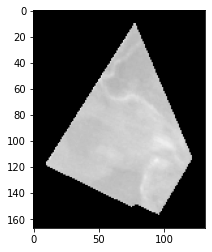

In [8]:
process.sat_visualize(0,2)

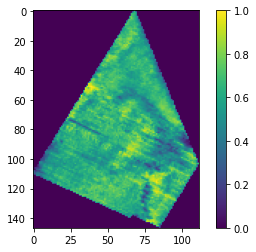

In [9]:
process.yield_visualize()

In [10]:
process.show_train_test_shape()

Train data shape: (5311, 10, 10, 21, 21)
Train label shape: (5311, 1)
Test data shape: (400, 10, 10, 21, 21)
Test label shape: (400, 1)


In [12]:
train = train_model()

In [14]:
res = train.run("MTMSST",process.train_S2,process.train_label,process.test_S2,process.test_label,epoch=1)

[1, 50] training_loss: 0.5320, validation_loss: 0.0074


In [15]:
network = torch.load('drive/MyDrive/Colab Notebooks/Thesis_Deliverable/Resources/2*2_VIVIT_with_cross.h5')
result = result_visualize(network,train.test)

In [16]:
result.show_metrics()

tensor(0.5330, device='cuda:0')
Calculated RMSE is:  0.061821570941501466
Calculated MAPE is:  0.07724934816360474
Calculated R squared is:  0.4670482873916626


tensor(0.5330, device='cuda:0')


/usr/local/lib/python3.8/dist-packages/mpl_scatter_density/generic_density_artist.py:77: RuntimeWarning: All-NaN slice encountered
  vmin = self._density_vmin(array)
/usr/local/lib/python3.8/dist-packages/mpl_scatter_density/generic_density_artist.py:82: RuntimeWarning: All-NaN slice encountered
  vmax = self._density_vmax(array)


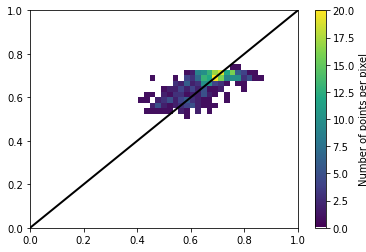

In [17]:
result.show_scatter()

In [18]:
coord = process.test_slice

400


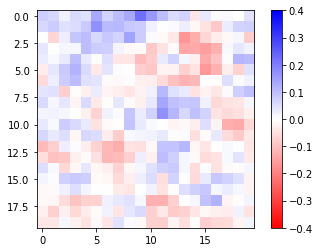

In [19]:
result.Visualize(result.net,coord)